In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [3]:
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.lines as mlines


font = {'size'   : 13}

matplotlib.rc('font', **font)


In [19]:
ho_df = pd.read_csv('b16_table1.csv', names=('Program', 'Type', 'SubProgram', 'H0', 'eH0up', 'eH0down', 'Reference'))

In [20]:
ho_df

,Program,Type,SubProgram,H0,eH0up,eH0down,Reference
0,KP,Cepheid,PreferredValue,72.0,8.00,8.00,Freedman et al. (2001)
1,WMAP1,CMB,WMAPOne-Year,72.0,5.00,5.00,Spergel et al. (2003)
2,WMAP3,CMB,WMAPThree-YearMean,73.2,2.10,3.20,Spergel et al. (2007)
3,WMAP5,CMB,WMAPFive-YearMean,71.9,2.60,2.70,Dunkley et al. (2009)
4,SH_0E^2S,Cepheid,LMCAnchor,74.2,3.60,3.60,Riess et al. (2009)
5,SH_0ES,Cepheid,PreferredValue,73.8,2.40,2.40,Riess et al. (2011)
6,WMAP7,CMB,WMAPSeven-YearMean,70.4,2.50,2.50,Komatsu et al. (2011)
7,CHP,Cepheid,LMCAnchorMIR,74.3,2.50,2.50,Freedman et al. (2012b)
8,WMAP9,CMB,WMAPNine-Year,70.0,2.20,2.20,Bennett et al. (2013)
9,P2013,CMB,Planck+WP+highL,67.3,1.20,1.20,Planck Collaboration et al. (2014)


In [21]:
### Remove all non-numeric characters from reference field to get year

ho_df['year'] = pd.to_numeric(ho_df['Reference'].str.extract('(\d+)', expand=False))


In [22]:
ho_df

,Program,Type,SubProgram,H0,eH0up,eH0down,Reference,year
0,KP,Cepheid,PreferredValue,72.0,8.00,8.00,Freedman et al. (2001),2001
1,WMAP1,CMB,WMAPOne-Year,72.0,5.00,5.00,Spergel et al. (2003),2003
2,WMAP3,CMB,WMAPThree-YearMean,73.2,2.10,3.20,Spergel et al. (2007),2007
3,WMAP5,CMB,WMAPFive-YearMean,71.9,2.60,2.70,Dunkley et al. (2009),2009
4,SH_0E^2S,Cepheid,LMCAnchor,74.2,3.60,3.60,Riess et al. (2009),2009
5,SH_0ES,Cepheid,PreferredValue,73.8,2.40,2.40,Riess et al. (2011),2011
6,WMAP7,CMB,WMAPSeven-YearMean,70.4,2.50,2.50,Komatsu et al. (2011),2011
7,CHP,Cepheid,LMCAnchorMIR,74.3,2.50,2.50,Freedman et al. (2012b),2012
8,WMAP9,CMB,WMAPNine-Year,70.0,2.20,2.20,Bennett et al. (2013),2013
9,P2013,CMB,Planck+WP+highL,67.3,1.20,1.20,Planck Collaboration et al. (2014),2014


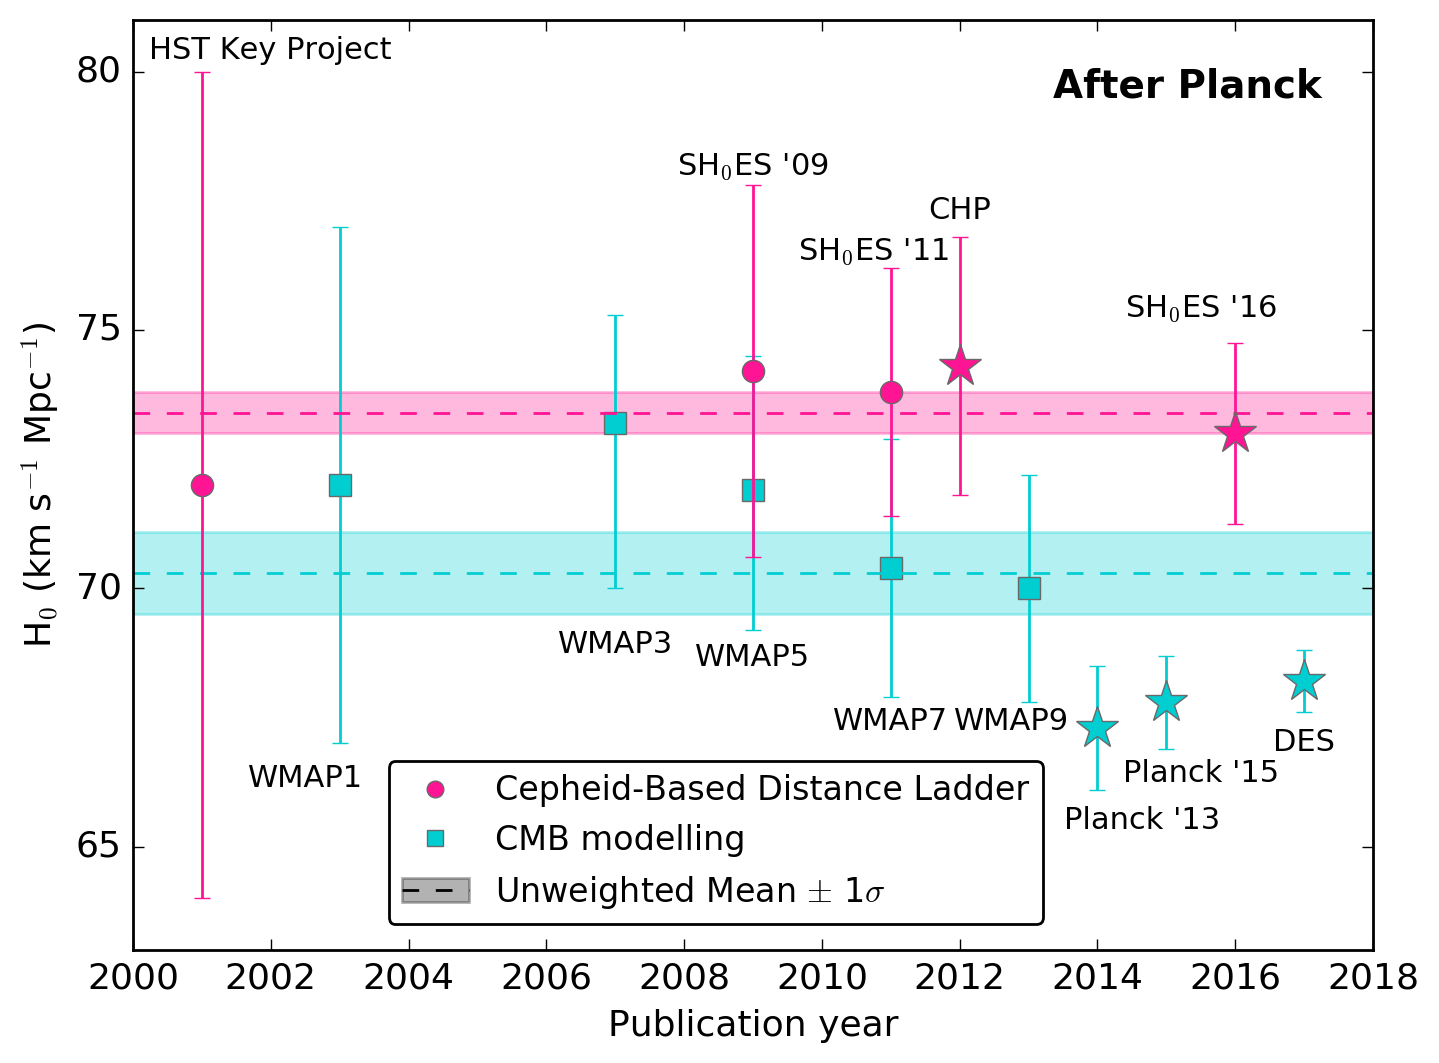

In [46]:
fig = mp.figure(figsize=(8,6))
axp1 = fig.add_subplot(111)

#z = randn(10)

#red_dot, = plt.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
#white_cross, = plt.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

#plt.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])

x = np.arange(2000,2018,1)
y = np.ones(np.shape(x))*50

axp1.errorbar(ho_df.year[ho_df.Type=='CMB'], ho_df.H0[ho_df.Type=='CMB'], yerr=[ho_df.eH0down[ho_df.Type=='CMB'], ho_df.eH0up[ho_df.Type=='CMB']], ls='None', color='DarkTurquoise', label='')
axp1.plot(ho_df.year[(ho_df.Type=='CMB') & (ho_df.Program!='P2015') & (ho_df.Program!='P2013') & (ho_df.Program!='DES')], ho_df.H0[(ho_df.Type=='CMB') & (ho_df.Program!='P2013') & (ho_df.Program!='P2015') & (ho_df.Program!='DES')], ls='None', color='DarkTurquoise', mec='DimGray', marker='s', label='CMB modelling', ms=8)

axp1.plot(ho_df.year[ho_df.Program=='P2013'], ho_df.H0[ho_df.Program=='P2013'], ls='None', color='DarkTurquoise', mec='DimGray', marker='*', label='', ms=16, zorder=4)
axp1.plot(ho_df.year[ho_df.Program=='P2015'], ho_df.H0[ho_df.Program=='P2015'], ls='None', color='DarkTurquoise', mec='DimGray', marker='*', label='', ms=16, zorder=4)
axp1.plot(ho_df.year[ho_df.Program=='DES'], ho_df.H0[ho_df.Program=='DES'], ls='None', color='DarkTurquoise', mec='DimGray', marker='*', label='', ms=16, zorder=4)


axp1.errorbar(ho_df.year[ho_df.Type=='Cepheid'], ho_df.H0[ho_df.Type=='Cepheid'], yerr=[ho_df.eH0down[ho_df.Type=='Cepheid'], ho_df.eH0up[ho_df.Type=='Cepheid']], ls='None', color='DeepPink', zorder=4, label='')
axp1.plot(ho_df.year[(ho_df.Type=='Cepheid') & (ho_df.year!=2016) & (ho_df.Program!='CHP')], ho_df.H0[(ho_df.Type=='Cepheid') & (ho_df.year!=2016) & (ho_df.Program!='CHP')], ls='None', mfc='DeepPink', mec='DimGray', marker='o', zorder=4, label='Cepheids', ms=8)
axp1.plot(ho_df.year[ho_df.Program=='CHP'], ho_df.H0[ho_df.Program=='CHP'], ls='None', mfc='DeepPink', mec='DimGray', marker='*', label='', ms=16, zorder=4)
axp1.plot(ho_df.year[ho_df.year==2016], ho_df.H0[ho_df.year==2016], ls='None', mfc='DeepPink', mec='DimGray', marker='*', label='', ms=16, zorder=4)



myaxis=[2000,2018,63,81]
axp1.axis(myaxis)

x = np.arange(2000,2019,1)

axp1.axhline(70.3, ls='--', color='DarkTurquoise')
axp1.fill_between(x, 70.3-0.8, 70.3+0.8, color='DarkTurquoise', alpha=0.3)

axp1.axhline(73.4, ls='--', color='DeepPink')
axp1.fill_between(x, 73.4-0.4, 73.4+0.4, color='DeepPink', alpha=0.3)

mp.xlabel('Publication year')
mp.ylabel('H$_{0}$ (km s$^{-1}$ Mpc$^{-1}$)')

exline = axp1.axhline(50.0, ls='--', color='black')
exfill = axp1.axhspan(49.8, 50.2, 2000, 2017, color='black', alpha=0.3)

cmb = mlines.Line2D([], [], mfc='DarkTurquoise', mec='DimGray',marker='s', ls='None', label='CMB modelling')
cep = mlines.Line2D([], [], mfc='DeepPink', mec='DimGray', marker='o', ls='None', label='Cepheid')



axp1.annotate('Planck \'13', xy=(2014.65, 65.35), xycoords='data', ha='center', fontsize=11)
axp1.annotate('Planck \'15', xy=(2015.5, 66.25), xycoords='data', ha='center', fontsize=11)

axp1.annotate('CHP', xy=(2012, 77.15), xycoords='data', ha='center', fontsize=11)

axp1.annotate('SH$_0$ES \'16', xy=(2015.5, 75.25), xycoords='data', ha='center', fontsize=11)
axp1.annotate('SH$_0$ES \'09', xy=(2009, 78), xycoords='data', ha='center', fontsize=11)
axp1.annotate('SH$_0$ES \'11', xy=(2010.75, 76.35), xycoords='data', ha='center', fontsize=11)

axp1.annotate('HST Key Project', xy=(2002, 80.25), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP1', xy=(2002.5, 66.15), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP3', xy=(2007, 68.75), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP5', xy=(2009, 68.5), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP7', xy=(2011, 67.25), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP9', xy=(2012.75, 67.25), xycoords='data', ha='center', fontsize=11)
axp1.annotate('DES', xy=(2017, 66.85), xycoords='data', ha='center', fontsize=11)



axp1.legend(handles=[cep, cmb, (exfill, exline)], labels=['Cepheid-Based Distance Ladder', 'CMB modelling', 'Unweighted Mean $\\pm$ 1$\\sigma$', ], numpoints=1, fancybox=True, fontsize=12, loc=8, bbox_to_anchor=(0.47, 0.01,))

axp1.annotate('After Planck', xy=(2015.3, 79.5), xycoords='data', ha='center', fontsize=14, fontweight='bold')

mp.savefig('ho_beaton16_remake.pdf', transparent=True, bbox_inches='tight')

In [24]:
ho_df.Type

0     Cepheid
1         CMB
2         CMB
3         CMB
4     Cepheid
5     Cepheid
6         CMB
7     Cepheid
8         CMB
9         CMB
10        CMB
11    Cepheid
12        CMB
Name: Type, dtype: object

In [29]:
ho_df[ho_df.pre_planck==True]

,Program,Type,SubProgram,H0,eH0up,eH0down,Reference,year,pre_planck
0,KP,Cepheid,PreferredValue,72.0,8.0,8.0,Freedman et al. (2001),2001,True
1,WMAP1,CMB,WMAPOne-Year,72.0,5.0,5.0,Spergel et al. (2003),2003,True
2,WMAP3,CMB,WMAPThree-YearMean,73.2,2.1,3.2,Spergel et al. (2007),2007,True
3,WMAP5,CMB,WMAPFive-YearMean,71.9,2.6,2.7,Dunkley et al. (2009),2009,True
4,SH_0E^2S,Cepheid,LMCAnchor,74.2,3.6,3.6,Riess et al. (2009),2009,True
5,SH_0ES,Cepheid,PreferredValue,73.8,2.4,2.4,Riess et al. (2011),2011,True
6,WMAP7,CMB,WMAPSeven-YearMean,70.4,2.5,2.5,Komatsu et al. (2011),2011,True
7,CHP,Cepheid,LMCAnchorMIR,74.3,2.5,2.5,Freedman et al. (2012b),2012,True
8,WMAP9,CMB,WMAPNine-Year,70.0,2.2,2.2,Bennett et al. (2013),2013,True


In [26]:
ho_df['pre_planck'][ho_df.year>2013] = False


/Users/vs522/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Program,Type,SubProgram,H0,eH0up,eH0down,Reference,year,pre_planck
0,KP,Cepheid,PreferredValue,72.0,8.00,8.00,Freedman et al. (2001),2001,True
1,WMAP1,CMB,WMAPOne-Year,72.0,5.00,5.00,Spergel et al. (2003),2003,True
2,WMAP3,CMB,WMAPThree-YearMean,73.2,2.10,3.20,Spergel et al. (2007),2007,True
3,WMAP5,CMB,WMAPFive-YearMean,71.9,2.60,2.70,Dunkley et al. (2009),2009,True
4,SH_0E^2S,Cepheid,LMCAnchor,74.2,3.60,3.60,Riess et al. (2009),2009,True
5,SH_0ES,Cepheid,PreferredValue,73.8,2.40,2.40,Riess et al. (2011),2011,True
6,WMAP7,CMB,WMAPSeven-YearMean,70.4,2.50,2.50,Komatsu et al. (2011),2011,True
7,CHP,Cepheid,LMCAnchorMIR,74.3,2.50,2.50,Freedman et al. (2012b),2012,True
8,WMAP9,CMB,WMAPNine-Year,70.0,2.20,2.20,Bennett et al. (2013),2013,True
9,P2013,CMB,Planck+WP+highL,67.3,1.20,1.20,Planck Collaboration et al. (2014),2014,False


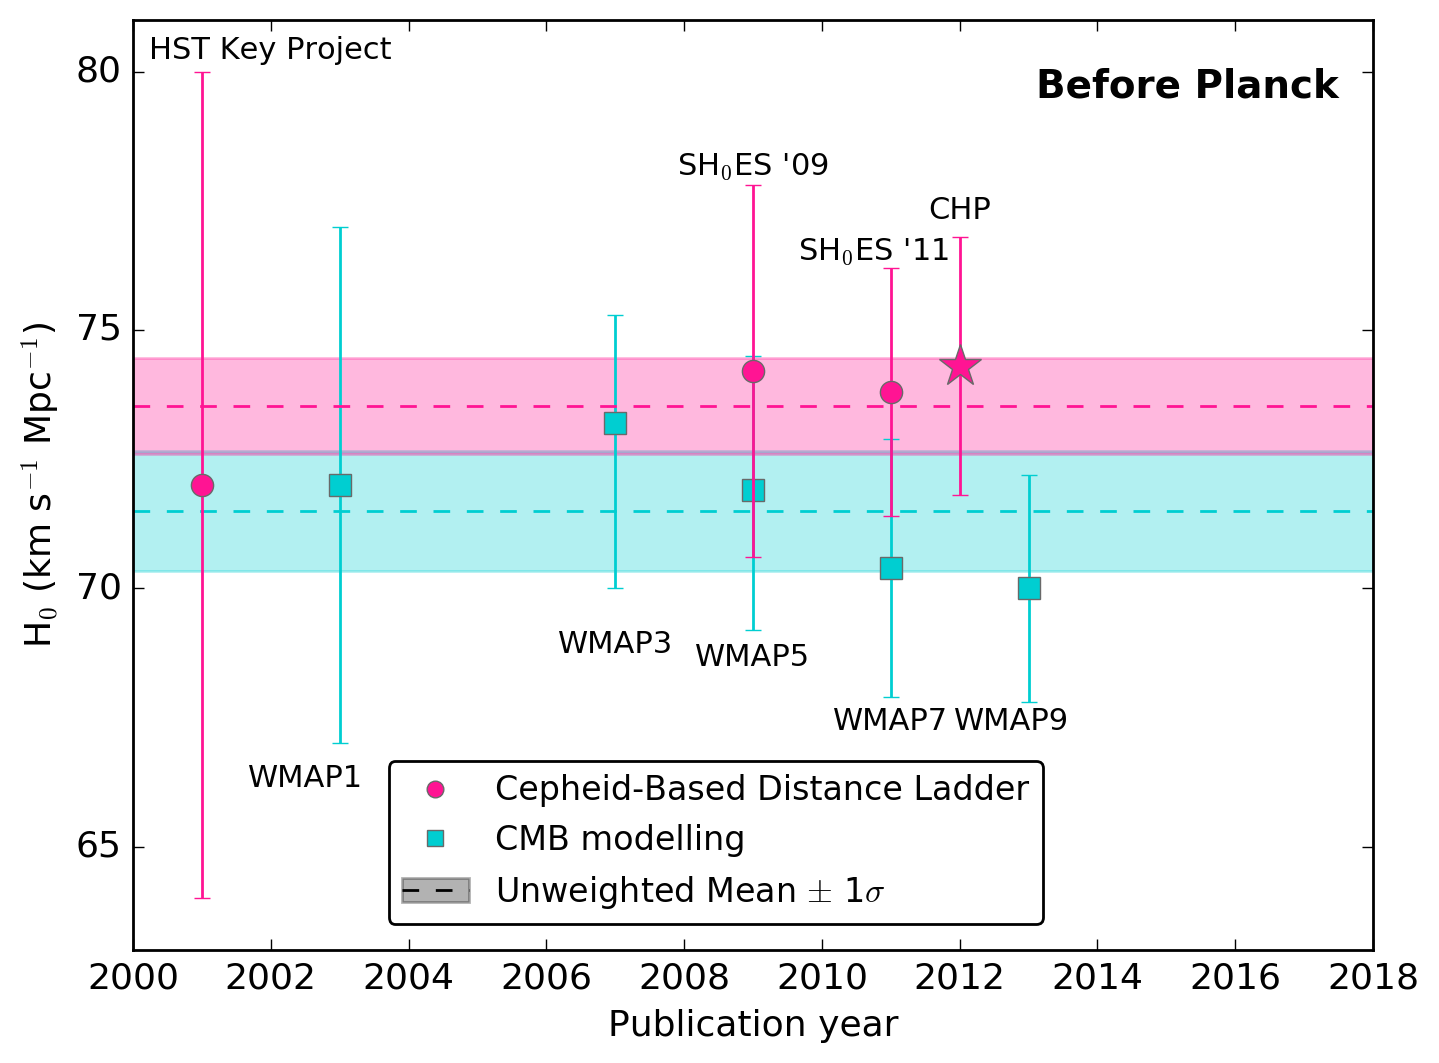

In [45]:
fig = mp.figure(figsize=(8,6))
axp1 = fig.add_subplot(111)

#z = randn(10)

#red_dot, = plt.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
#white_cross, = plt.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

#plt.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])

x = np.arange(2000,2018,1)
y = np.ones(np.shape(x))*50

pre_planck = ho_df[ho_df.pre_planck==True]

axp1.errorbar(pre_planck.year[pre_planck.Type=='CMB'], pre_planck.H0[pre_planck.Type=='CMB'], yerr=[pre_planck.eH0down[pre_planck.Type=='CMB'], pre_planck.eH0up[pre_planck.Type=='CMB']], ls='None', color='DarkTurquoise', label='')
axp1.plot(pre_planck.year[(pre_planck.Type=='CMB')], pre_planck.H0[(pre_planck.Type=='CMB')], ls='None', color='DarkTurquoise', mec='DimGray', marker='s', label='CMB modelling', ms=8)



axp1.errorbar(pre_planck.year[pre_planck.Type=='Cepheid'], pre_planck.H0[pre_planck.Type=='Cepheid'], yerr=[pre_planck.eH0down[pre_planck.Type=='Cepheid'], pre_planck.eH0up[pre_planck.Type=='Cepheid']], ls='None', color='DeepPink', zorder=4, label='')
axp1.plot(pre_planck.year[(pre_planck.Type=='Cepheid') & (pre_planck.Program!='CHP')], pre_planck.H0[(pre_planck.Type=='Cepheid') & (pre_planck.Program!='CHP')], ls='None', mfc='DeepPink', mec='DimGray', marker='o', zorder=4, label='Cepheids', ms=8)
axp1.plot(pre_planck.year[pre_planck.Program=='CHP'], pre_planck.H0[pre_planck.Program=='CHP'], ls='None', mfc='DeepPink', mec='DimGray', marker='*', label='', ms=16, zorder=4)



myaxis=[2000,2018,63,81]
axp1.axis(myaxis)

x = np.arange(2000,2019,1)

axp1.axhline(71.5, ls='--', color='DarkTurquoise')
axp1.fill_between(x, 71.5-1.16, 71.5+1.16, color='DarkTurquoise', alpha=0.3)

axp1.axhline(73.535, ls='--', color='DeepPink')
axp1.fill_between(x, 73.53-0.93, 73.53+0.93, color='DeepPink', alpha=0.3)

mp.xlabel('Publication year')
mp.ylabel('H$_{0}$ (km s$^{-1}$ Mpc$^{-1}$)')

exline = axp1.axhline(50.0, ls='--', color='black')
exfill = axp1.axhspan(49.8, 50.2, 2000, 2017, color='black', alpha=0.3)

cmb = mlines.Line2D([], [], mfc='DarkTurquoise', mec='DimGray',marker='s', ls='None', label='CMB modelling')
cep = mlines.Line2D([], [], mfc='DeepPink', mec='DimGray', marker='o', ls='None', label='Cepheid')


axp1.annotate('CHP', xy=(2012, 77.15), xycoords='data', ha='center', fontsize=11)

axp1.annotate('SH$_0$ES \'09', xy=(2009, 78), xycoords='data', ha='center', fontsize=11)
axp1.annotate('SH$_0$ES \'11', xy=(2010.75, 76.35), xycoords='data', ha='center', fontsize=11)

axp1.annotate('HST Key Project', xy=(2002, 80.25), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP1', xy=(2002.5, 66.15), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP3', xy=(2007, 68.75), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP5', xy=(2009, 68.5), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP7', xy=(2011, 67.25), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP9', xy=(2012.75, 67.25), xycoords='data', ha='center', fontsize=11)

axp1.annotate('Before Planck', xy=(2015.3, 79.5), xycoords='data', ha='center', fontsize=14, fontweight='bold')


axp1.legend(handles=[cep, cmb, (exfill, exline)], labels=['Cepheid-Based Distance Ladder', 'CMB modelling', 'Unweighted Mean $\\pm$ 1$\\sigma$', ], numpoints=1, fancybox=True, fontsize=12, loc=8, bbox_to_anchor=(0.47, 0.01,))


mp.savefig('ho_beaton16_remake_preplanck.pdf', transparent=True, bbox_inches='tight')

In [33]:
np.std(pre_planck.H0[(pre_planck.Type=='Cepheid')])

0.92837223138135683

In [34]:
np.mean(pre_planck.H0[(pre_planck.Type=='CMB')])

71.5

In [35]:
np.std(pre_planck.H0[(pre_planck.Type=='CMB')])

1.1627553482998907